SCRIPTING LANGUAGES FINAL ASSINGMENT# Scripting languages final assignment:
Exploratory analysis of the Rotten Tomatoes movies and critic reviews dataset

In the following notebook I am performing exploratory analysis of the Rotten Tomatoes movies and critic reviews dataset. The dataset was uploaded on Kaggle.com by the user Stefano Leone under CC0: Public Domain license. Below there are links to the data.

https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_critic_reviews.csv
https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv

The dataset consists of two CSV files. The first one is storing movies available on Rotten Tomatoes, with the URL used for the scraping, each movie's tile, description, genres, duration, director, actors, users' ratings, and critics' ratings. In the second one there are critic reviews published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

In my analysis I am exploring the critic reviews of four selected movie genres. I am I am also looking into the data about the movies' directors.

Part 1.
Importing the necessary modules and reading the files.

In [209]:
import pandas as pd
import nltk
import seaborn as sns

In [210]:
#I have downloaded the files to my computer, 
#therefore I am using local filepaths to access them.

df_1 = pd.read_csv(r'C:\Users\wlosz\Downloads\rotten_tomatoes_movies.csv\rotten_tomatoes_movies.csv')
df_2 = pd.read_csv(r'C:\Users\wlosz\Downloads\rotten_tomatoes_critic_reviews.csv\rotten_tomatoes_critic_reviews.csv')

Part 2.
Selecting the data

In [211]:
#Firstly I am inspecting the colums of both csv files.
df_1.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [212]:
df_2.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

In [213]:
#I am selecting the columns that are going to be useful for the purpose of my analysis from both csv files.
df_1_selected = df_1[['rotten_tomatoes_link', 'movie_title', 'genres', 'directors', 'tomatometer_rating']]
df_1_selected

,rotten_tomatoes_link,movie_title,genres,directors,tomatometer_rating
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0
1,m/0878835,Please Give,Comedy,Nicole Holofcener,87.0
2,m/10,10,"Comedy, Romance",Blake Edwards,67.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Classics, Drama",Sidney Lumet,100.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",Richard Fleischer,89.0
...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,"Drama, Musical & Performing Arts",Luis Valdez,56.0
17708,m/zootopia,Zootopia,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",98.0
17709,m/zorba_the_greek,Zorba the Greek,"Action & Adventure, Art House & International,...",NaN,80.0
17710,m/zulu,Zulu,"Classics, Drama","Cy Endfield, Cyril Endfield",96.0


In [214]:
df_2_selected = df_2[['rotten_tomatoes_link', 'review_content']]
df_2_selected

,rotten_tomatoes_link,review_content
0,m/0814255,A fantasy adventure that fuses Greek mythology...
1,m/0814255,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,With a top-notch cast and dazzling special eff...
3,m/0814255,Whether audiences will get behind The Lightnin...
4,m/0814255,What's really lacking in The Lightning Thief i...
...,...,...
1130012,m/zulu_dawn,NaN
1130013,m/zulu_dawn,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,"A simple two-act story: Prelude to war, and th..."


In [215]:
#I want to keep all of the data in one dataframe. 
#For this purpose, I am merging the two dataframes on the 'rotten_tomatoes_link' column;
#this column contains unique identifiers of all of the movies.

data = pd.DataFrame.merge(df_1_selected,df_2_selected,on='rotten_tomatoes_link')
data

,rotten_tomatoes_link,movie_title,genres,directors,tomatometer_rating,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,NaN
1129883,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"Seen today, it's not only a startling indictme..."
1129884,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,A rousing visual spectacle that's a prequel of...
1129885,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"A simple two-act story: Prelude to war, and th..."


In [216]:
#In order to decide which movie genres that I am going to focus on, I am creating the list of 10 genres
#most frequently occuring in the 'genres' column

data['genres'].value_counts()[:10].index.tolist()

['Drama',
 'Comedy',
 'Comedy, Drama',
 'Drama, Mystery & Suspense',
 'Action & Adventure, Drama',
 'Art House & International, Drama',
 'Action & Adventure, Science Fiction & Fantasy',
 'Action & Adventure, Drama, Mystery & Suspense',
 'Comedy, Drama, Romance',
 'Drama, Romance']

In [217]:
#Upon inspecting the 'genres' column I decided to select the following 4 genres:

genres = ['Drama', 'Comedy', 'Action', 'Romance']

In [218]:
#It is important to note that most movies are classified as belonging to more than one genre.
#Since it is impossible for me to guess which genre is the most important one for each movie I decided to consider
#the first word of the 'genres' column to be the basis for classifing each movie.
#To avoid confusion between the original 'genres' column and the simplified genres selected by me, I am going to refer
#to the genres selected by me as 'labels'.

labels = []
for i in data['genres']:
    labels.append(str(i).split()[0])

#I am creating the lables dataframe that contains the first word of the 'genres' column for each movie.
#Then I concat it with the existing data dataframe.

labels = pd.DataFrame(labels, columns=['label'])
labels
movies = pd.concat([data, labels], axis=1)
movies

,rotten_tomatoes_link,movie_title,genres,directors,tomatometer_rating,review_content,label
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,A fantasy adventure that fuses Greek mythology...,Action
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,"Uma Thurman as Medusa, the gorgon with a coiff...",Action
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,With a top-notch cast and dazzling special eff...,Action
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,Whether audiences will get behind The Lightnin...,Action
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,What's really lacking in The Lightning Thief i...,Action
...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,NaN,Action
1129883,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"Seen today, it's not only a startling indictme...",Action
1129884,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,A rousing visual spectacle that's a prequel of...,Action
1129885,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"A simple two-act story: Prelude to war, and th...",Action


In [219]:
#Next I am filtering the movies and keeping only those having the selected labels.

movies_filtered = movies[movies['label'].isin(genres)] 
movies_filtered

,rotten_tomatoes_link,movie_title,genres,directors,tomatometer_rating,review_content,label
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,A fantasy adventure that fuses Greek mythology...,Action
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,"Uma Thurman as Medusa, the gorgon with a coiff...",Action
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,With a top-notch cast and dazzling special eff...,Action
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,Whether audiences will get behind The Lightnin...,Action
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,49.0,What's really lacking in The Lightning Thief i...,Action
...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,NaN,Action
1129883,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"Seen today, it's not only a startling indictme...",Action
1129884,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,A rousing visual spectacle that's a prequel of...,Action
1129885,m/zulu_dawn,Zulu Dawn,"Action & Adventure, Art House & International,...",Douglas Hickox,50.0,"A simple two-act story: Prelude to war, and th...",Action


Part 3.
Analysis of the ratings

In [220]:
#I am calculating the number of movies belonging to each label.

occur = movies_filtered.groupby(['label']).size()
display(occur)

label
Action     296654
Comedy      85234
Drama      145478
Romance       466
dtype: int64

<AxesSubplot:xlabel='label', ylabel='tomatometer_rating'>

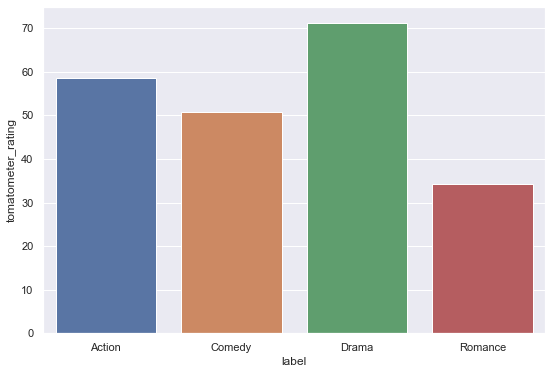

In [221]:
#I calculate and plot the average rating for each label.

ratings = pd.DataFrame(movies_filtered.groupby('label')['tomatometer_rating'].mean())
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(data=ratings, x=ratings.index, y="tomatometer_rating")


In [222]:
#As can be seen drama movies have the highest average rating. 
#Action movies' rating scores are positive on average.
#Comedy movies average rating is around 50. 
#The average rating of romance movies is negative - a little higher than 30.

Part 4.
Review analysis - action movies

In [223]:
#To analyze the reviews I am going to use the NLTK module. 

import nltk
nltk.download('punkt')

#I create a review_collector funtion.
#This function takes the label name as input and itereates over the review contents of the movies having this label.
#It returns a list of reviews, where each review is a list of words.

def review_collector(label):
    rev = []
    for review in movies_filtered[movies_filtered['label']==label]["review_content"]:
        if review != "NaN":
            rev.append(str(review).split())
    return rev


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wlosz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [224]:
#I collect reviews of the movies from each label.

action_rev = review_collector("Action")
comedy_rev = review_collector("Comedy")
drama_rev = review_collector("Drama")
romance_rev = review_collector("Romance")

In [225]:
#I create a preprocessing function that tokenizes the words in reviews list. 
#It removes the punctuation and transforms words into lowercase.
#It returns the reviews as a single list of words.

def preprocessing(reviews):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~“”...''``	--'''
    rev_list_words = []
    for line in reviews:
        rev_list_words.append(" ".join(line))
    
    rev_text = " ".join(rev_list_words)

    corpus = nltk.word_tokenize(rev_text)

    #In the corpus contractions such as 'isn't' are considered to be two separate words
    corpus_clean = [x.lower() for x in corpus if not x in punc]
    return corpus_clean


In [226]:
#I start my analysis with movies having the 'action' label.

action_prep = preprocessing(action_rev)

In [227]:
#I import the stopwords from nltk.corpus. 
#I append the stopwords with some words that appear in the reviews but have no information value.
#Then I create a stopwrods_filter function that returns the list of words that are not stopwords.

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
my_stopwords = ["", "nan", "'s", "n't", "'ve"]
stopwords.extend(my_stopwords)

def stopwords_filter(words):
    not_stopw = []
    for word in words:
        if word not in stopwords:
            not_stopw.append(word)
    return not_stopw


In [228]:
#I import the FreqDist function which I am going to use for calculating the frequencies of the words.
from nltk import FreqDist

#I remove the stopwords from preprocessed action reviews.

action = stopwords_filter(action_prep)

#Then I select 30 most frequently occuring words using the FreqDist function and display them in a dataframe.
action_freq = FreqDist(action).most_common(30)

pd.DataFrame(action_freq, columns = ["Word", "Frequency"])

,Word,Frequency
0,film,41691
1,movie,39578
2,one,23800
3,like,20332
4,action,20142
5,story,13824
6,good,13505
7,much,12804
8,fun,12627
9,even,11789


<AxesSubplot:>

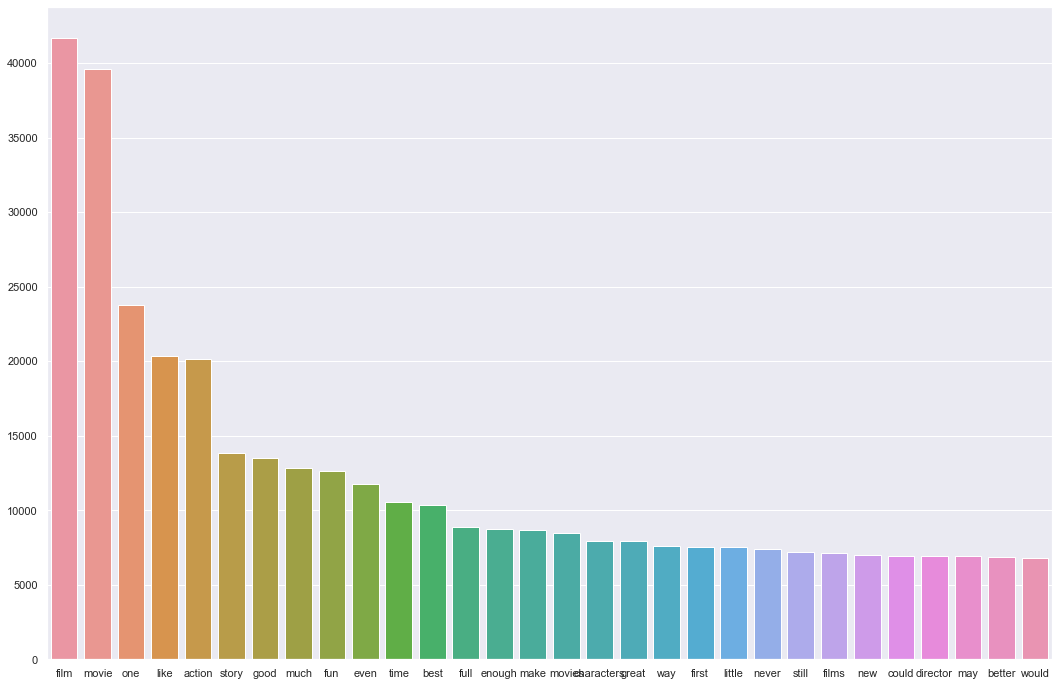

In [229]:
#In order to display the 30 most frequent words as a seaborn barplot I create a dictionary.

action_dict = {"x":[i for i,j in action_freq], "y":[j for i,j in action_freq]}

#I plot the dictionary.

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=action_dict, x="x", y="y")

In [230]:
#Unsurprisinlgy the most frequently occuring words are "film" and "movie".
#Other words relating to movies, such as "action" or "characters" can also be found on the chart.
#There are many adjectives among the 30 most frequently used words: "good", "fun", "best", "great" etc.

In [231]:
#To express their opinion on a movie, movie critics often use adjectives.
#This fact is illustrated by the chart above.
#Therefore I decided to take a closer look at adjectives appearing in the movies reviews.
#In order to do that I am using part of speech tagging.

#Firslty I import the average perceptron tagger and tag words from action reviews as parts of speech.

nltk.download('averaged_perceptron_tagger')

action_pos_tags = nltk.pos_tag(action)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wlosz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [232]:
#I create a list of adjectives used in action movies reviews.

action_adj = [i for (i,j) in action_pos_tags if j in ["JJ"]]

#Then I compute the frequencies of the adjectives and select 20 most commonly used ones. 

action_adj_freq = FreqDist(action_adj).most_common(20)

#I display them in a dataframe.

pd.DataFrame(action_adj_freq, columns = ["Adjective", "Frequency"])


,Adjective,Frequency
0,good,13333
1,much,9379
2,full,8897
3,great,7943
4,little,7042
5,new,7020
6,bad,6212
7,spanish,5701
8,many,5479
9,original,5290


<AxesSubplot:>

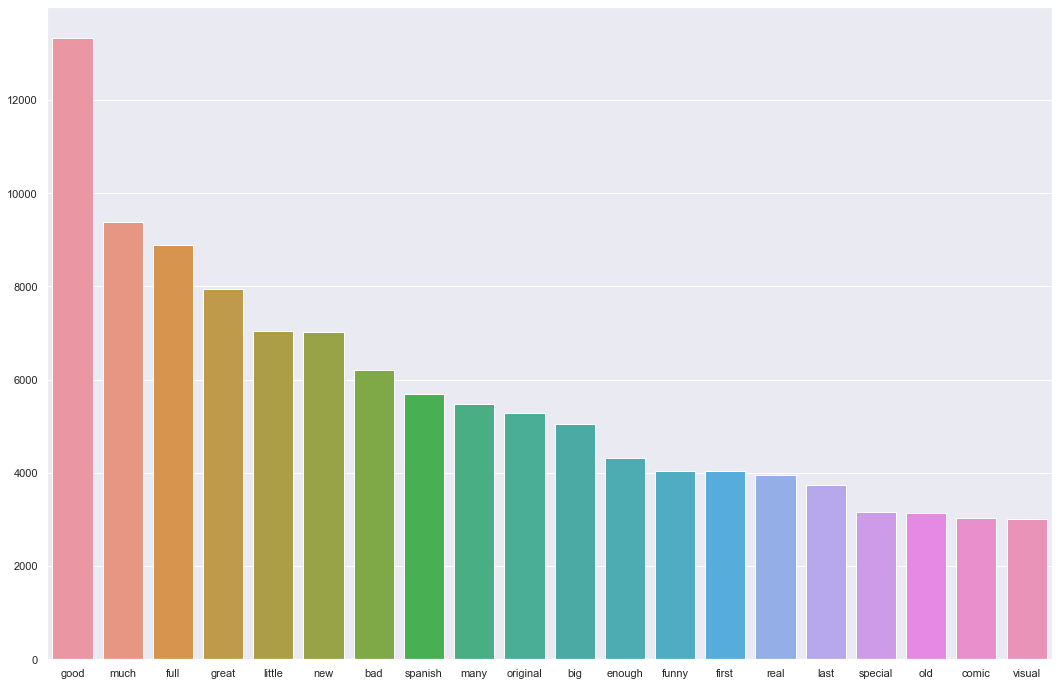

In [233]:
#In order to display the 30 most frequent words as a seaborn barplot I create a dictionary.

action_adj_dict = {"x":[i for i,j in action_adj_freq], "y":[j for i,j in action_adj_freq]}

#I plot the dictionary.

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=action_adj_dict, x="x", y="y")

In [234]:
#The most frequently occured adjective is "good". 
#This makes sense as action movies ratings are on average positive.
#However, the word "bad" is also among the most frequently occuring adjectives.
#Generally there are more postive than negative adjectives on the chart.

In [235]:
#Adjectives used in movie reviews can be neutral, positive or negative. 
#In order to take a closer look at the sentiment of the adjectives used by the movie critics
#I use the vader sentiment analysis tool and conduct a very simple sentiment analysis.

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#Vader can be used to analyze sentiment of parts of text larger than one word, such as sentences.
#In this analysis however, I am only interested in getting the sentiments of singular words.
#In order to do that I create a get_vader_score funtion that returns a list of vader scores for each word from the 
#input corpus.
#The score of 0 indicates negative sentiment, the score of 1 indicates neutral sentiment and the score of 2 indicates
#positive sentiment.

def get_vader_score(corpus):
    scores = []
    for word in corpus:
        ss = sid.polarity_scores(word)
        scores.append(np.argmax(list(ss.values())[:-1]))
    return scores


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wlosz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [236]:
#I create a dictionary that calculates the number of negative, positive and neutral adjectives.

action_sent_dic = {
    "Negative":get_vader_score(action_adj).count(0),
    "Neutral":get_vader_score(action_adj).count(1),
    "Positive":get_vader_score(action_adj).count(2)
    }

<BarContainer object of 3 artists>

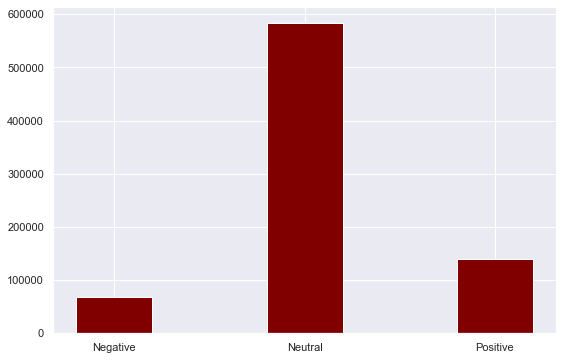

In [237]:
#I plot the dictionary using matplotlib.

plt.figure(figsize=(9,6))
plt.bar(list(action_sent_dic.keys()), list(action_sent_dic.values()), color ='maroon',
        width = 0.4)

In [238]:
#As can be seen the number of neutral adjectives is the highest.
#However, there are more positive than negative adjectives.
#This is consistent with the 20 most freqently used adjectives chart.

In [239]:
#The next step is getting a list of collocations.
#For this puropose I firstly lemmatize words using WordNetLemmatizer. 
#Lemmatizing the words is important because it will keep the collocations list from containing many slightly varied 
#version of the same collocation.

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words


In [240]:
#I create and display the collocations list.

from nltk import Text
new_text = nltk.Text(lemmatize(action))
action_coll = new_text.collocation_list()
action_coll

[('review', 'spanish'),
 ('full', 'review'),
 ('special', 'effect'),
 ('feel', 'like'),
 ('star', 'war'),
 ('comic', 'book'),
 ('video', 'game'),
 ('action', 'sequence'),
 ('martial', 'art'),
 ('star', 'trek'),
 ('science', 'fiction'),
 ('harry', 'potter'),
 ('two', 'hour'),
 ('set', 'piece'),
 ('james', 'bond'),
 ('jackie', 'chan'),
 ('big', 'screen'),
 ('del', 'toro'),
 ('robin', 'hood'),
 ('michael', 'bay')]

In [241]:
#Among the collocations there are many phrases relating to the things that can be associated with action movies such as:
#'special effect', 'comic book' (action movies are often based on comic books), 'action sequence' or
#'martial art'. 
#There are also names of popular action movies sych as 'star wars' or 'star trek'. 
#Names of popular action movie characters can also be found in collocations.

In the next parts of the notebook I am going to repeat all the steps that I took in my analysis of action movies to analyse comedy, drama and romance movies.

Part 5.
Review analysis - comedy movies

In [242]:
comedy_prep = preprocessing(comedy_rev)

In [243]:
comedy = stopwords_filter(comedy_prep)
comedy_freq = FreqDist(comedy).most_common(30)

pd.DataFrame(comedy_freq, columns = ["Word", "Frequency"])

,Word,Frequency
0,movie,10753
1,comedy,10729
2,film,10069
3,funny,7030
4,like,6262
5,one,6115
6,even,3648
7,much,3620
8,good,3438
9,make,2952


<AxesSubplot:>

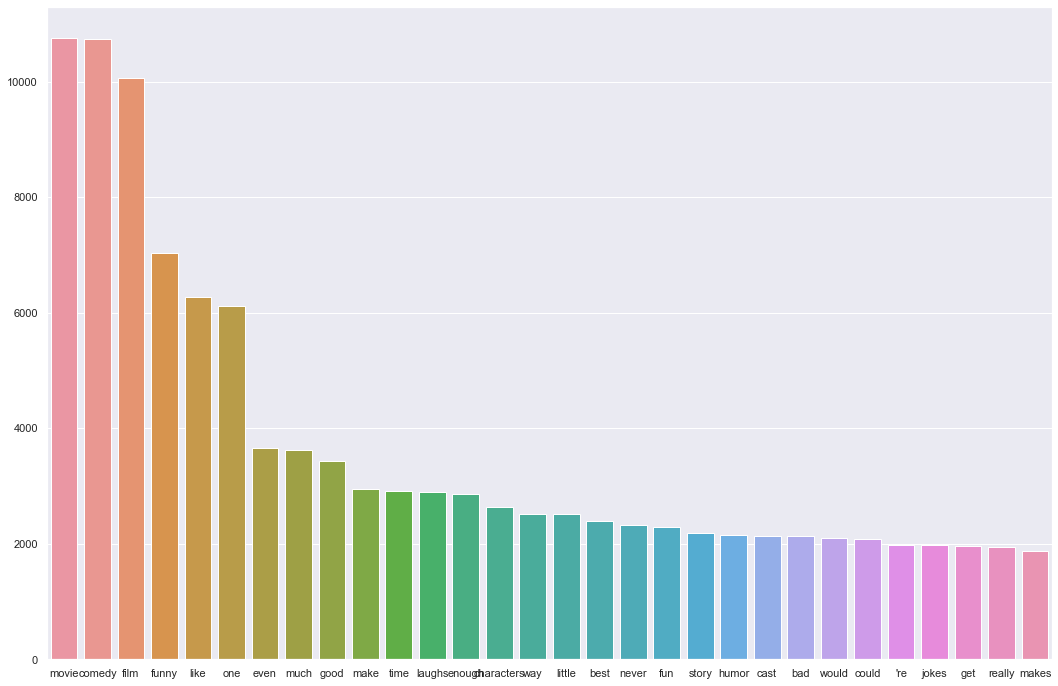

In [244]:
comedy_dict = {"x":[i for i,j in comedy_freq], "y":[j for i,j in comedy_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=comedy_dict, x="x", y="y")

In [245]:
#Similarly as in the case of action movies, the words 'movie' and 'film' are one of the most common ones
#in the comedy reviews.
#There are also many words associated with comedies such as 'funny', 'laughs' or 'humor'.
#Many adjectives can be found on the chart, however, unlike in the case of action movies,
#the most freqently occuring one is 'funny'.

In [246]:
comedy_pos_tags = nltk.pos_tag(comedy)

In [247]:
comedy_adj = [i for (i,j) in comedy_pos_tags if j in ["JJ"]]
comedy_adj_freq = FreqDist(comedy_adj).most_common(20)
pd.DataFrame(comedy_adj_freq, columns = ["Adjective", "Frequency"])


,Adjective,Frequency
0,funny,6036
1,good,3395
2,much,2608
3,little,2383
4,bad,2135
5,full,1674
6,great,1592
7,many,1590
8,comic,1538
9,new,1402


<AxesSubplot:>

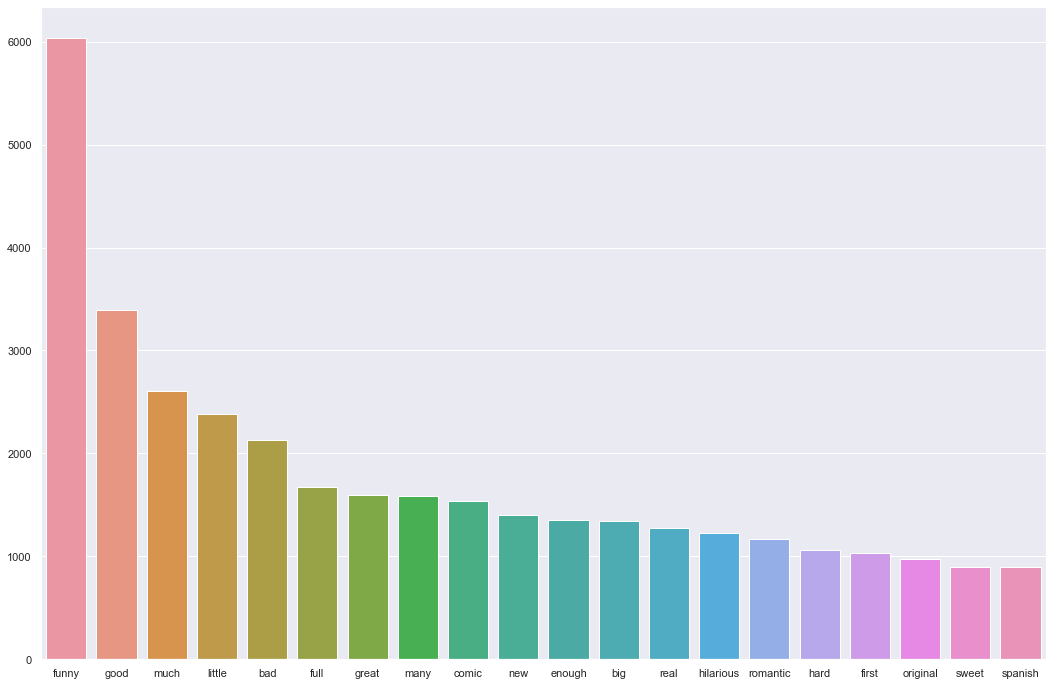

In [248]:
comedy_adj_dict = {"x":[i for i,j in comedy_adj_freq], "y":[j for i,j in comedy_adj_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=comedy_adj_dict, x="x", y="y")

In [249]:
#Many of the most common adjectives relate to humor. Examples of those are 'funny', 'comic' or 'hilarious'.
#The most frequently occuring adjectives seem to be mostly positive.

In [250]:
comedy_sent_dic = {
    "Negative":get_vader_score(comedy_adj).count(0),
    "Neutral":get_vader_score(comedy_adj).count(1),
    "Positive":get_vader_score(comedy_adj).count(2)
    }

<BarContainer object of 3 artists>

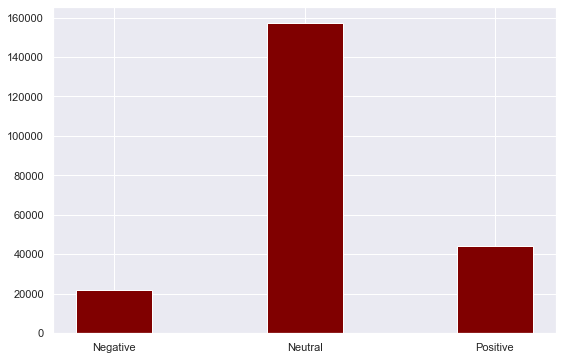

In [251]:
plt.figure(figsize=(9,6))
plt.bar(list(comedy_sent_dic.keys()), list(comedy_sent_dic.values()), color ='maroon',
        width = 0.4)

In [252]:
#As was the case with action movies, the adjectives are mostly neutral.
#There are more positive than negative adjectives.

In [253]:
comedy_text = nltk.Text(lemmatize(comedy))
comedy_coll = comedy_text.collocation_list()
comedy_coll

[('review', 'spanish'),
 ('full', 'review'),
 ('romantic', 'comedy'),
 ('feel', 'like'),
 ('high', 'school'),
 ('adam', 'sandler'),
 ('melissa', 'mccarthy'),
 ('judd', 'apatow'),
 ('woody', 'allen'),
 ('baron', 'cohen'),
 ('silver', 'lining'),
 ('wes', 'anderson'),
 ('farrelly', 'brother'),
 ('lining', 'playbook'),
 ('hail', 'caesar'),
 ('saturday', 'night'),
 ('bill', 'murray'),
 ('american', 'pie'),
 ('road', 'trip'),
 ('coen', 'brother')]

In [254]:
#In the collocation list for comedy movies there are mostly names of comedy actors and directors. 
#The phrase 'romantic comedy' is also among the collocations, which is not surprising as romantic
#comedies are one of the most popular types of comedies.

Part 6.
Review analysis - drama movies

In [255]:
drama_prep = preprocessing(drama_rev)

In [256]:
drama = stopwords_filter(drama_prep)
drama_freq = FreqDist(drama).most_common(30)

pd.DataFrame(drama_freq, columns = ["Word", "Frequency"])

,Word,Frequency
0,film,27748
1,movie,15529
2,one,11801
3,story,11434
4,like,9059
5,drama,7404
6,performance,6447
7,performances,5643
8,much,5611
9,even,5566


<AxesSubplot:>

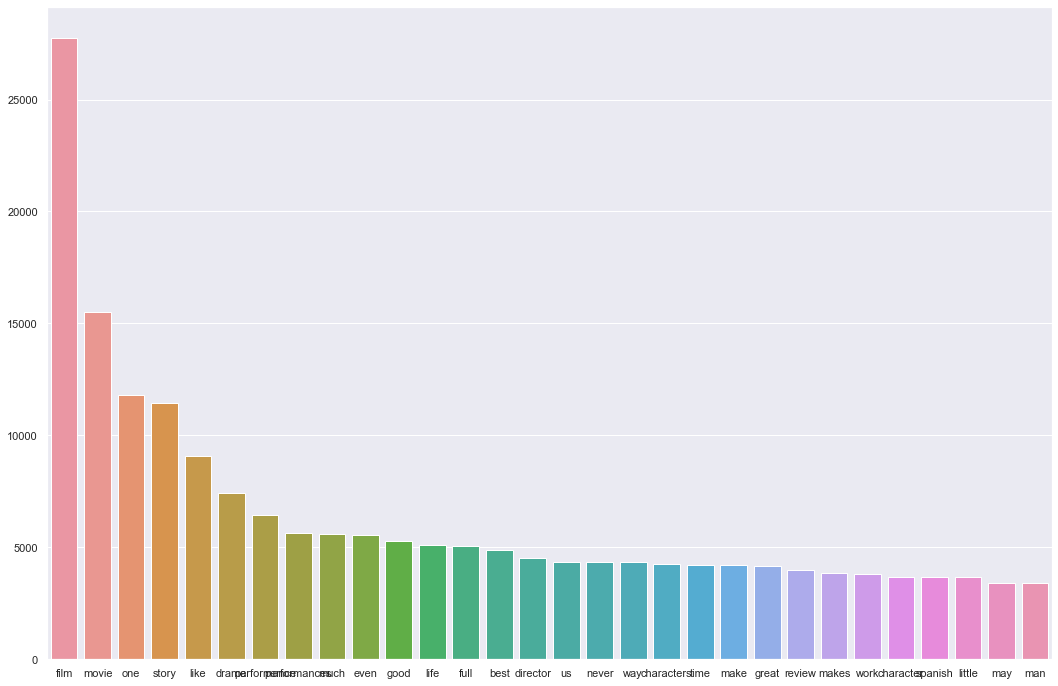

In [257]:
drama_dict = {"x":[i for i,j in drama_freq], "y":[j for i,j in drama_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=drama_dict, x="x", y="y")

In [258]:
#Aside from 'film' and 'movie' which seem to be frequently used in all movie reviews, there are many words relating to movies and acting
#among the 30 most commonly occuring words in drama reviews. Examples of that are 'drama', 'performances',
#"story" and "characters".

In [259]:
drama_pos_tags = nltk.pos_tag(drama)

In [260]:
drama_adj = [i for (i,j) in drama_pos_tags if j in ["JJ"]]
drama_adj_freq = FreqDist(drama_adj).most_common(20)
pd.DataFrame(drama_adj_freq, columns = ["Adjective", "Frequency"])

,Adjective,Frequency
0,good,5210
1,full,5056
2,great,4151
3,much,4109
4,spanish,3639
5,little,3439
6,emotional,2884
7,many,2721
8,real,2651
9,new,2414


<AxesSubplot:>

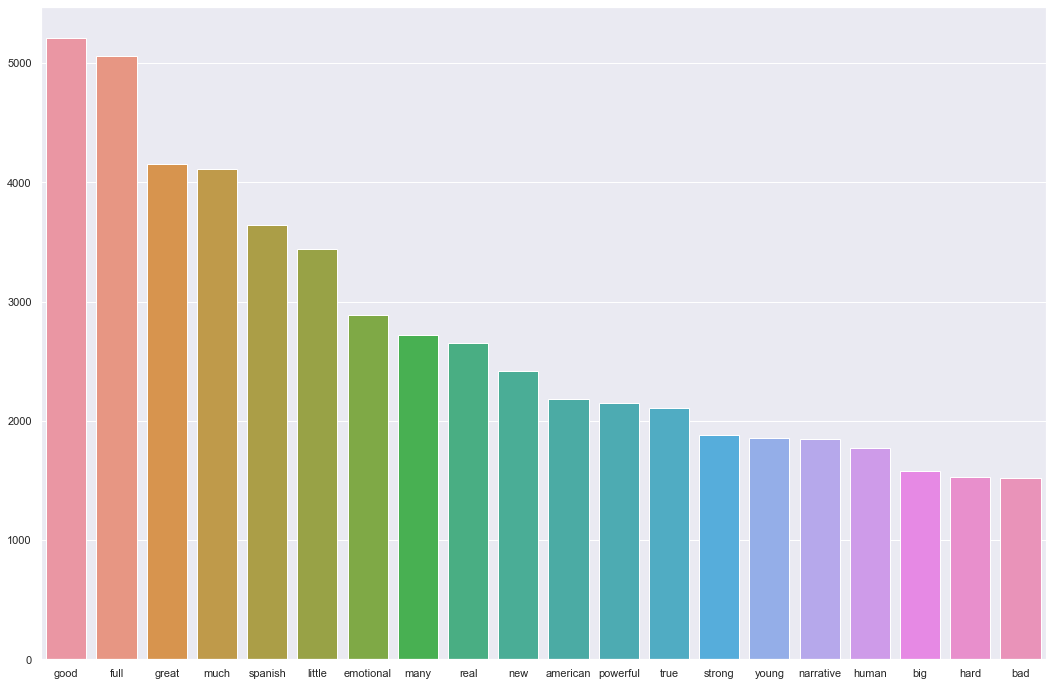

In [261]:
drama_adj_dict = {"x":[i for i,j in drama_adj_freq], "y":[j for i,j in drama_adj_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=drama_adj_dict, x="x", y="y")

In [262]:
#Since drama movies are typically more serious and less humorous, it is no surprise that adjectives occurring frequently
#in drama movies reviews are "emotional", "real", "powerful" or "true".

In [263]:
drama_sent_dic = {
    "Negative":get_vader_score(drama_adj).count(0),
    "Neutral":get_vader_score(drama_adj).count(1),
    "Positive":get_vader_score(drama_adj).count(2)
    }

<BarContainer object of 3 artists>

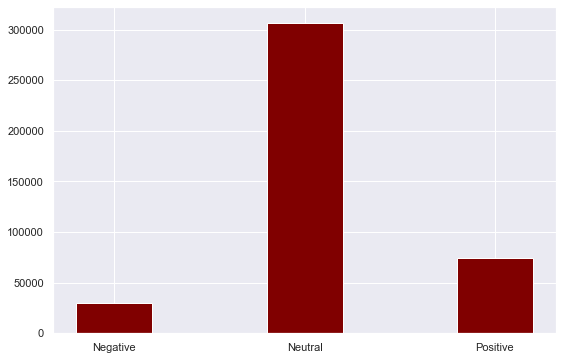

In [264]:
plt.figure(figsize=(9,6))
plt.bar(list(drama_sent_dic.keys()), list(drama_sent_dic.values()), color ='maroon',
        width = 0.4)

In [265]:
#As in the cases of previously analyzed genres there is a mojority of neutral adjectives in drama reviews.
#However, the number of positive adjectives is much higher than the number of negative ones.

In [266]:
drama_text = nltk.Text(lemmatize(drama))
drama_coll = drama_text.collocation_list()
drama_coll

[('review', 'spanish'),
 ('full', 'review'),
 ('feel', 'like'),
 ('character', 'study'),
 ('subject', 'matter'),
 ('new', 'york'),
 ('true', 'story'),
 ('one', 'best'),
 ('van', 'sant'),
 ('worth', 'seeing'),
 ('directorial', 'debut'),
 ('soap', 'opera'),
 ('two', 'hour'),
 ('clint', 'eastwood'),
 ('bohemian', 'rhapsody'),
 ('richard', 'jewell'),
 ('denzel', 'washington'),
 ('wall', 'street'),
 ('oliver', 'stone'),
 ('steve', 'job')]

In [267]:
#There are many phrases that can be associated with drama movies among the collocations.
#Examples of those are 'character study' or 'ture story'.
#There are also names of actors and creators of drama movies.

Part 7.
Review analysis - romance movies

In [268]:
romance_prep = preprocessing(romance_rev)

In [269]:
romance = stopwords_filter(romance_prep)
romance_freq = FreqDist(romance).most_common(30)

pd.DataFrame(romance_freq, columns = ["Word", "Frequency"])

,Word,Frequency
0,movie,81
1,film,76
2,shades,74
3,grey,72
4,fifty,62
5,like,39
6,much,33
7,one,30
8,romance,28
9,could,26


<AxesSubplot:>

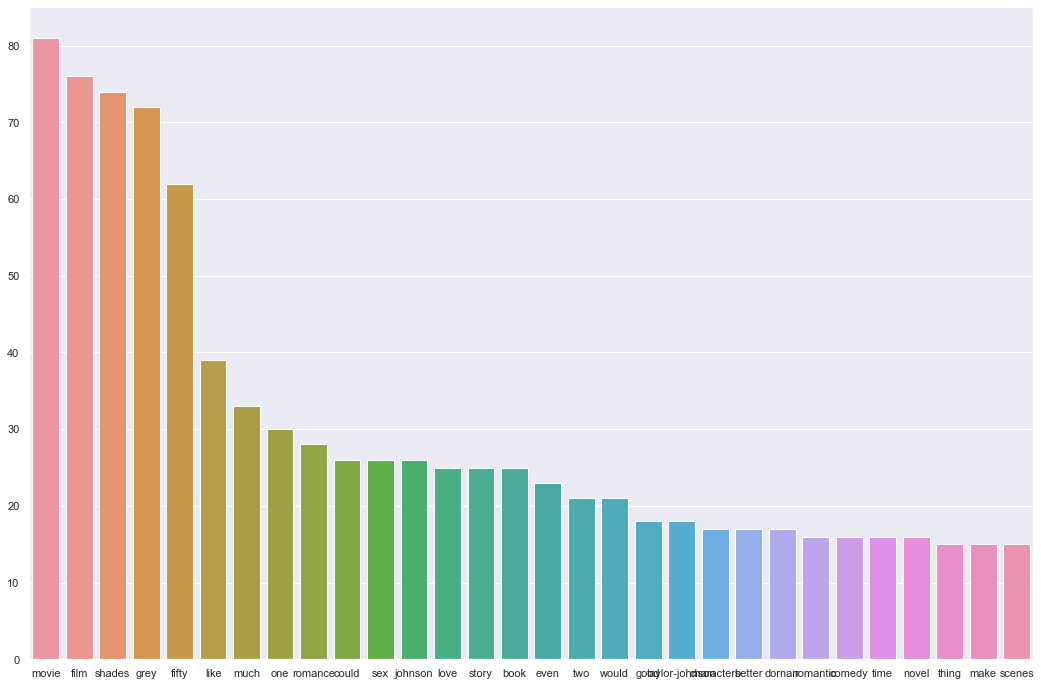

In [270]:
romance_dict = {"x":[i for i,j in romance_freq], "y":[j for i,j in romance_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=romance_dict, x="x", y="y")

In [271]:
#"Movie" and "film" are most frequently occuring words in romance movies reviews.
#Many of the other most common words are words relating to romance such as "love", "sex", or "romantic". 
#There are also many words reffering to the "50 Shades of Grey" saga, which indicates
#that the movies from this series were frequently reviewed.

In [272]:
romance_pos_tags = nltk.pos_tag(romance)

In [273]:
romance_adj = [i for (i,j) in romance_pos_tags if j in ["JJ"]]
romance_adj_freq = FreqDist(romance_adj).most_common(20)
pd.DataFrame(romance_adj_freq, columns = ["Adjective", "Frequency"])

,Adjective,Frequency
0,fifty,26
1,much,23
2,romantic,16
3,good,16
4,sexual,15
5,bad,14
6,full,12
7,taylor-johnson,12
8,christian,12
9,little,11


<AxesSubplot:>

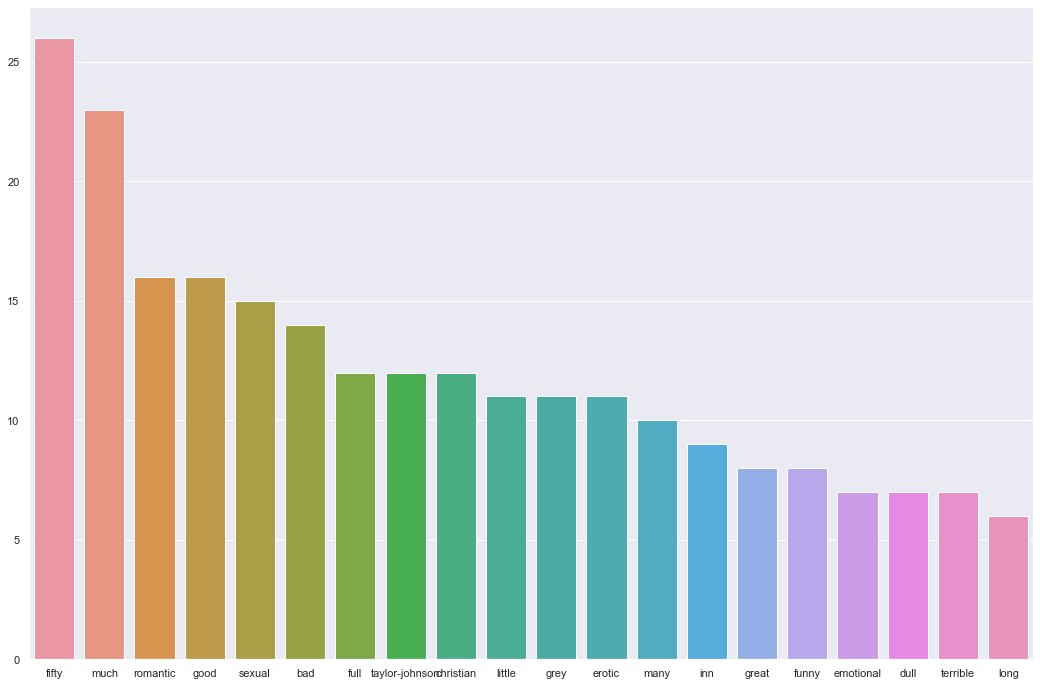

In [274]:
romance_adj_dict = {"x":[i for i,j in romance_adj_freq], "y":[j for i,j in romance_adj_freq]}

sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(data=romance_adj_dict, x="x", y="y")

In [275]:
#Among the most frequently occuring adjectives there can be found many words relating to romance. 
#The examples of those are "romantic", "sexual", "erotic", or "emotional".

In [276]:
romance_sent_dic = {
    "Negative":get_vader_score(romance_adj).count(0),
    "Neutral":get_vader_score(romance_adj).count(1),
    "Positive":get_vader_score(romance_adj).count(2)
    }

<BarContainer object of 3 artists>

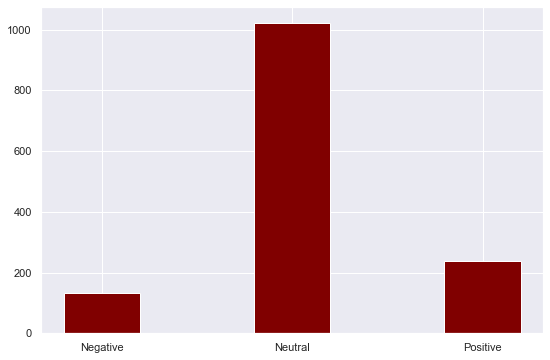

In [277]:
plt.figure(figsize=(9,6))
plt.bar(list(romance_sent_dic.keys()), list(romance_sent_dic.values()), color ='maroon',
        width = 0.4)

In [278]:
#There are mostly neutral adjectives in romance movies reviews.
#The number of positive adjectives is higher than the number of negative ones,
#however the differece between the proportion of positive and negative adjectives
#is smaller than in the case of for example drama movies.
#This makes sense as romance movies were those with the lowest average rating. 

In [279]:
romance_text = nltk.Text(lemmatize(romance))
romance_coll = romance_text.collocation_list()
romance_coll

[('fifty', 'shade'),
 ('shade', 'grey'),
 ('dakota', 'johnson'),
 ('falling', 'inn'),
 ('jamie', 'dornan'),
 ('sam', 'taylor-johnson'),
 ('inn', 'love'),
 ('romantic', 'comedy'),
 ('sway', 'lake'),
 ('royal', 'wedding'),
 ('song', 'sway'),
 ('review', 'spanish'),
 ('source', 'material'),
 ('e.l.', 'james'),
 ('full', 'review'),
 ('valentine', 'day'),
 ('fairy', 'tale'),
 ('princess', 'switch'),
 ('christmas', 'prince'),
 ('ari', 'gold')]

In [280]:
#There are many phrases relating to the "50 Shades of Grey" trilogy as well as other popular
#romance movies in the collocations list. There are also phrases associated with romance
#such as 'royal wedding' or 'fairy tale'.

Part 8.
Analysis of movie ratings by directors gender.

In [281]:
#I start with creatiing new dataframe in which only movie appears only once.
#This dataframe will be smaller and therefore easier to process and I won't loose any important data
#since in this part I am only interested in movie ratings, not reviews.

titles = []
labels = []
directors = []
rating = []
for i in range(len(movies_filtered)):
    if movies_filtered.iloc[i,:]["movie_title"] not in titles:
        titles.append(movies_filtered.iloc[i,:]["movie_title"])
        labels.append(movies_filtered.iloc[i,:]["label"])
        directors.append(movies_filtered.iloc[i,:]["directors"])
        rating.append((movies_filtered.iloc[i,:]["tomatometer_rating"]))
        

In [282]:
directors_data = pd.DataFrame(titles, columns = ["Title"])
directors_data["Label"] = labels
directors_data["Directors"] = directors
directors_data["Rating"] = rating
directors_data

,Title,Label,Directors,Rating
0,Percy Jackson & the Olympians: The Lightning T...,Action,Chris Columbus,49.0
1,Please Give,Comedy,Nicole Holofcener,87.0
2,"20,000 Leagues Under The Sea",Action,Richard Fleischer,89.0
3,"10,000 B.C.",Action,Roland Emmerich,8.0
4,The 39 Steps,Action,Alfred Hitchcock,96.0
...,...,...,...,...
6589,Zoolander 2,Comedy,Ben Stiller,22.0
6590,Zoom,Action,Peter Hewitt,4.0
6591,Zootopia,Action,"Byron Howard, Rich Moore, Jared Bush",98.0
6592,Zorba the Greek,Action,NaN,80.0


In [283]:
#I create a new column containing the first name of the director. 
#If the movie is directed by more than one person, I will only include the name of the first one of the directors. 
#For the purpose of the analysis I assume that the first director is the more important one.

directors_data['Dir_first_name'] = directors_data['Directors'].apply(lambda x: str(x).split()[0])
directors_data

,Title,Label,Directors,Rating,Dir_first_name
0,Percy Jackson & the Olympians: The Lightning T...,Action,Chris Columbus,49.0,Chris
1,Please Give,Comedy,Nicole Holofcener,87.0,Nicole
2,"20,000 Leagues Under The Sea",Action,Richard Fleischer,89.0,Richard
3,"10,000 B.C.",Action,Roland Emmerich,8.0,Roland
4,The 39 Steps,Action,Alfred Hitchcock,96.0,Alfred
...,...,...,...,...,...
6589,Zoolander 2,Comedy,Ben Stiller,22.0,Ben
6590,Zoom,Action,Peter Hewitt,4.0,Peter
6591,Zootopia,Action,"Byron Howard, Rich Moore, Jared Bush",98.0,Byron
6592,Zorba the Greek,Action,NaN,80.0,nan


In [284]:
#Once I have the first names of the directors I can use the gender_guesser module to infer the gender of the director.

import gender_guesser.detector as gender
from gender_guesser.detector import Detector

#In order to do that I create a infer_gender function that assigns inferred gender to each director.

def infer_gender(FirstName):
    d = Detector()
    gender = d.get_gender(FirstName)
    return gender

#I append the directors_data dataframe with a 'Gender' colunm. 

directors_data['Gender'] = directors_data['Dir_first_name'].apply(infer_gender)
directors_data.head(50)

,Title,Label,Directors,Rating,Dir_first_name,Gender
0,Percy Jackson & the Olympians: The Lightning T...,Action,Chris Columbus,49.0,Chris,mostly_male
1,Please Give,Comedy,Nicole Holofcener,87.0,Nicole,female
2,"20,000 Leagues Under The Sea",Action,Richard Fleischer,89.0,Richard,male
3,"10,000 B.C.",Action,Roland Emmerich,8.0,Roland,male
4,The 39 Steps,Action,Alfred Hitchcock,96.0,Alfred,male
5,The Lost City,Drama,Andy Garcia,25.0,Andy,male
6,The Breaking Point,Drama,Michael Curtiz,100.0,Michael,male
7,The Adventures of Mark Twain,Action,Will Vinton,80.0,Will,mostly_male
8,The Adventures of Robin Hood,Action,"Michael Curtiz, William Keighley",100.0,Michael,male
9,Bandwagon,Comedy,John Schultz,80.0,John,male


In [285]:
#Not all of the directors names where classified as male or female.
#To simplify the analysis I decided to only keep in the records 
#in which the director was classified as either male or female.

#In order to do that I create the disjunction function and two conditions - con1 and con2.
#The records that satisfy none of the conditions are removed.
#I create a new dataframe that contains filtered records from the directors_data dataframe.

import functools 

def disjunction(*conditions):
    return functools.reduce(np.logical_or, conditions)

con1 = directors_data.Gender == 'female'
con2 = directors_data.Gender == 'male'

directors_filtered = directors_data[disjunction(con1,con2)]

In [286]:
directors_filtered

,Title,Label,Directors,Rating,Dir_first_name,Gender
1,Please Give,Comedy,Nicole Holofcener,87.0,Nicole,female
2,"20,000 Leagues Under The Sea",Action,Richard Fleischer,89.0,Richard,male
3,"10,000 B.C.",Action,Roland Emmerich,8.0,Roland,male
4,The 39 Steps,Action,Alfred Hitchcock,96.0,Alfred,male
5,The Lost City,Drama,Andy Garcia,25.0,Andy,male
...,...,...,...,...,...,...
6588,Zoo,Action,Colin McIvor,88.0,Colin,male
6589,Zoolander 2,Comedy,Ben Stiller,22.0,Ben,male
6590,Zoom,Action,Peter Hewitt,4.0,Peter,male
6591,Zootopia,Action,"Byron Howard, Rich Moore, Jared Bush",98.0,Byron,male


In [287]:
#I calculate the precentage of female and male directors.
#In order to do that I create a new dataframe that contains the count of male and female directors. 
#Then I calculate the number of all directors and precentages of the female and male directors.

m_f = pd.DataFrame(directors_filtered.groupby('Gender')['Gender'].count())
dir_num = int(m_f.iloc[0,:]) + int(m_f.iloc[1,:]) 
print(int(m_f.iloc[0,:])/dir_num*100, r'% of directors are female')
print(int(m_f.iloc[1,:])/dir_num*100,r'% of directors are male.' )

8.229203855765798 % of directors are female
91.7707961442342 % of directors are male.


In [288]:
#As can be seen there are significantly more male than female directors.

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

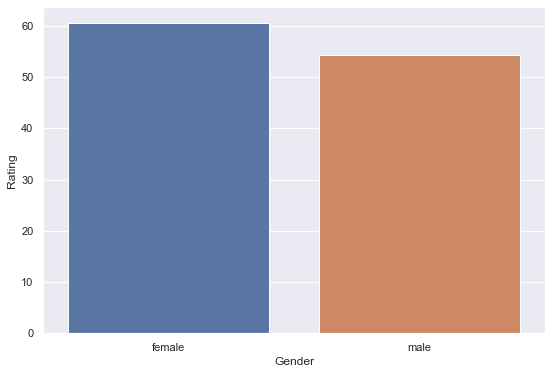

In [289]:
#I calculate the average rating of movies directed by women and men.
#I display the average ratings in form of a barplot.

ratings_g = pd.DataFrame(directors_filtered.groupby('Gender')['Rating'].mean())
ratings_g
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(data=ratings_g, x=ratings_g.index, y="Rating")

In [290]:
#Despite the huge majority of male directors, female directors are the ones who's movies recieve on averagde higher ratings.

In [291]:
#I calculate how many movies from each analyzed genre was made by man and women. 
#I display the results in a dataframe
genres_g = directors_filtered.groupby(['Gender', 'Label'])['Label'].count().unstack()
genres_g

Label,Action,Comedy,Drama,Romance
Gender,,,,
female,93,111,256,1
male,2817,973,1340,11


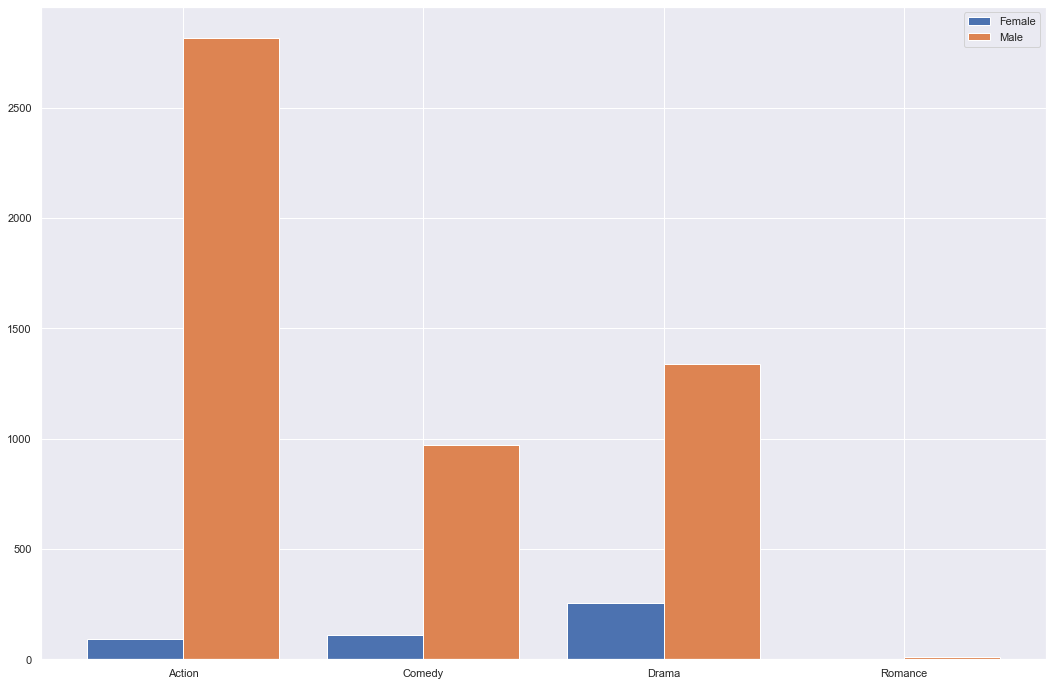

In [292]:
#I plot the calculated numbers of movies from each genre.
#I display the data on a barplot.

genders = [i for i in genres_g.columns]
female = [i for i in genres_g.iloc[0,:]]
male = [i for i in genres_g.iloc[1,:]]

x_axis = np.arange(len(genders))

#Since I want to have two seperate barplots for men and women I plot the data seperately. 

plt.figure(figsize=(18,12))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')


plt.xticks(x_axis, genders)
plt.legend()
plt.show()

In [293]:
#Movies from all of the genres are directed more often by men than by women.
#Most of the male director create action movies.
#Female directors direct mostly drama movies.